# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 7

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **24 апреля в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

## Задача 1 

(6 баллов)

Проводится испытание нового учебника по математике. Для исследований были отобраны 2500 школьников. Некоторые из них учились по новому учебнику, а другие — по старому. Измеряется количество школьников, сдавших пробный ЕГЭ на 4 и 5. В первой группе экзамен хорошо сдали 853  из 1719 школьников, учившихся по новому учебнику. Во второй группе значимое улучшение наблюдается среди  хорошо сдали 369  из 781 школьников, учившихся по старому. Влияет ли новый
учебник на результаты школьников?

*Основной поток* (+4 балла): Посчитайте коэффициенты ассоциации, контингенции и коэффициент корреляции Крамера. Сделайте выводы.

*Задачу можно писать на листочке. Все совпадения с реальными лицами и ситуациями случайны:)*

$H_0:$ учебник не влияет на успеваемость
$H_1:$ учебник влияет на успеваемость

Составим таблицу сопряженности:

| Был ли новый учебник? | Нет |  Да  | $\sum$ |
|:---------------------:|:---:|:----:|--------|
|      Сдали хорошо     | 369 |  853 | 1222   |
|      Сдали плохо      | 412 |  866 | 1278   |
| $\sum$                | 781 | 1719 | 2500   |


$\chi^2 (X, Y) = \sum\limits_{i=1}^2 \sum\limits_{j=1}^2 \frac{(n_{ij} - \frac{n_{i \cdot} n_{\cdot j}}{n})^2}{\frac{n_{i \cdot} n_{\cdot j}}{n}}$

Посчитаем 4 слагаемых в этой сумме:

$\chi^2 (X, Y) = 0.4260 + 0.1935 + 0.1850 + 0.4073 = 1.2118$

Посчитаем $1-\alpha$ квантиль распределения $\chi^2_1$

`quantile = sps.chi2(df=1).ppf(1-0.05)`

In [40]:
chi2_quantile = sps.chi2(df=1).ppf(1-0.05)
print('Квантиль распределения: ', chi2_quantile)

Квантиль распределения:  3.841458820694124


Как видно, квантиль распределения хи-квадрат больше статистики хи-квадрат. А значит, мы не отвергаем нулевую гипотезу о независимости. Значит учебники не влияют на успеваемость. Также, тот же самый результат о неотвержении может показать точный тест Фишера.

In [5]:
# воспользуемся точным тестом Фишера 
p_v = sps.fisher_exact([[369, 412], [853, 866]])
print(p_v)

(0.9092807794306788, 0.2806574506919555)


p-value = 0.28 > 0.05

Посчитаем коэф-ы ассоциации, контингенции, корреляции Крамера:

$\phi_C (X, Y) = \sqrt{\frac{\chi^2 (X, Y)}{n (min(k_1, k_2) -1)}} = 0.02$ - очень близко к 0, что говорит об отсутствии связи

Коэф. ассоциации $Q = \frac{ad-bc}{ad+bc} = -0.05$ - очень близко к 0, что говорит об отсутствии связи

Коэф. контингенции $V = \frac{ad-bc}{\sqrt{(a+b)(a+c)(c+d)(d+b)}} = -0.02$ - очень близко к 0, что говорит об отсутствии связи

---

## Задача 2

Рассмотрим последовательность чисел

    1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17 


*Базовый поток* (4 балла): Посчитайте коэффициенты корреляции Пирсона, Спирмена и Кендалла для этой последовательности и последовательности 

    1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Сделайте выводы.

*Основной поток* (8 баллов): Можно ли на уровне значимости 0.05 считать, что эта последовательность чисел 
является реализацией случайного вектора, все 10 компонент которого независимые одинаково распределенные случайные величины? Вывод сделайте на основе коэффициентов корреляции. Придумайте алгоритм проверки самостоятельно.


---

In [39]:
# видно, что связанных пар нет, поэтому поправок делать не будем
X = np.array([1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17])
Y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


p_coef, p_p_val = sps.pearsonr(X, Y)
s_coef, s_p_val = sps.spearmanr(X, Y)
k_coef, k_p_val = sps.kendalltau(X, Y)

print(f'Коэффициент Корреляции Пирсона {round(p_coef, 3)}\nКоэффициент Корреляции Спирмена {round(s_coef,3)}\n\
Коэффициент Корреляции Кендалла {round(k_coef, 3)}')
print('==================================================')
print(f'p-value Пирсона {p_p_val}\np-value Спирмена {s_p_val}\n\
p-value Кендалла {k_p_val}')


Коэффициент Корреляции Пирсона 0.992
Коэффициент Корреляции Спирмена 1.0
Коэффициент Корреляции Кендалла 1.0
p-value Пирсона 1.6057001182059872e-08
p-value Спирмена 6.646897422032013e-64
p-value Кендалла 5.511463844797178e-07


Видно, что все 3 коэффициента корреляции очень близки к 1, что говорит о зависимости выборок. Также p-value очень близки к 0, значит гипотеза о независимости отвегается. 

## Задача 3: Белые мыши наносят ответный удар

(14 баллов)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [14]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()


MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [15]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Количество записей каждого класса:

In [16]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [17]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

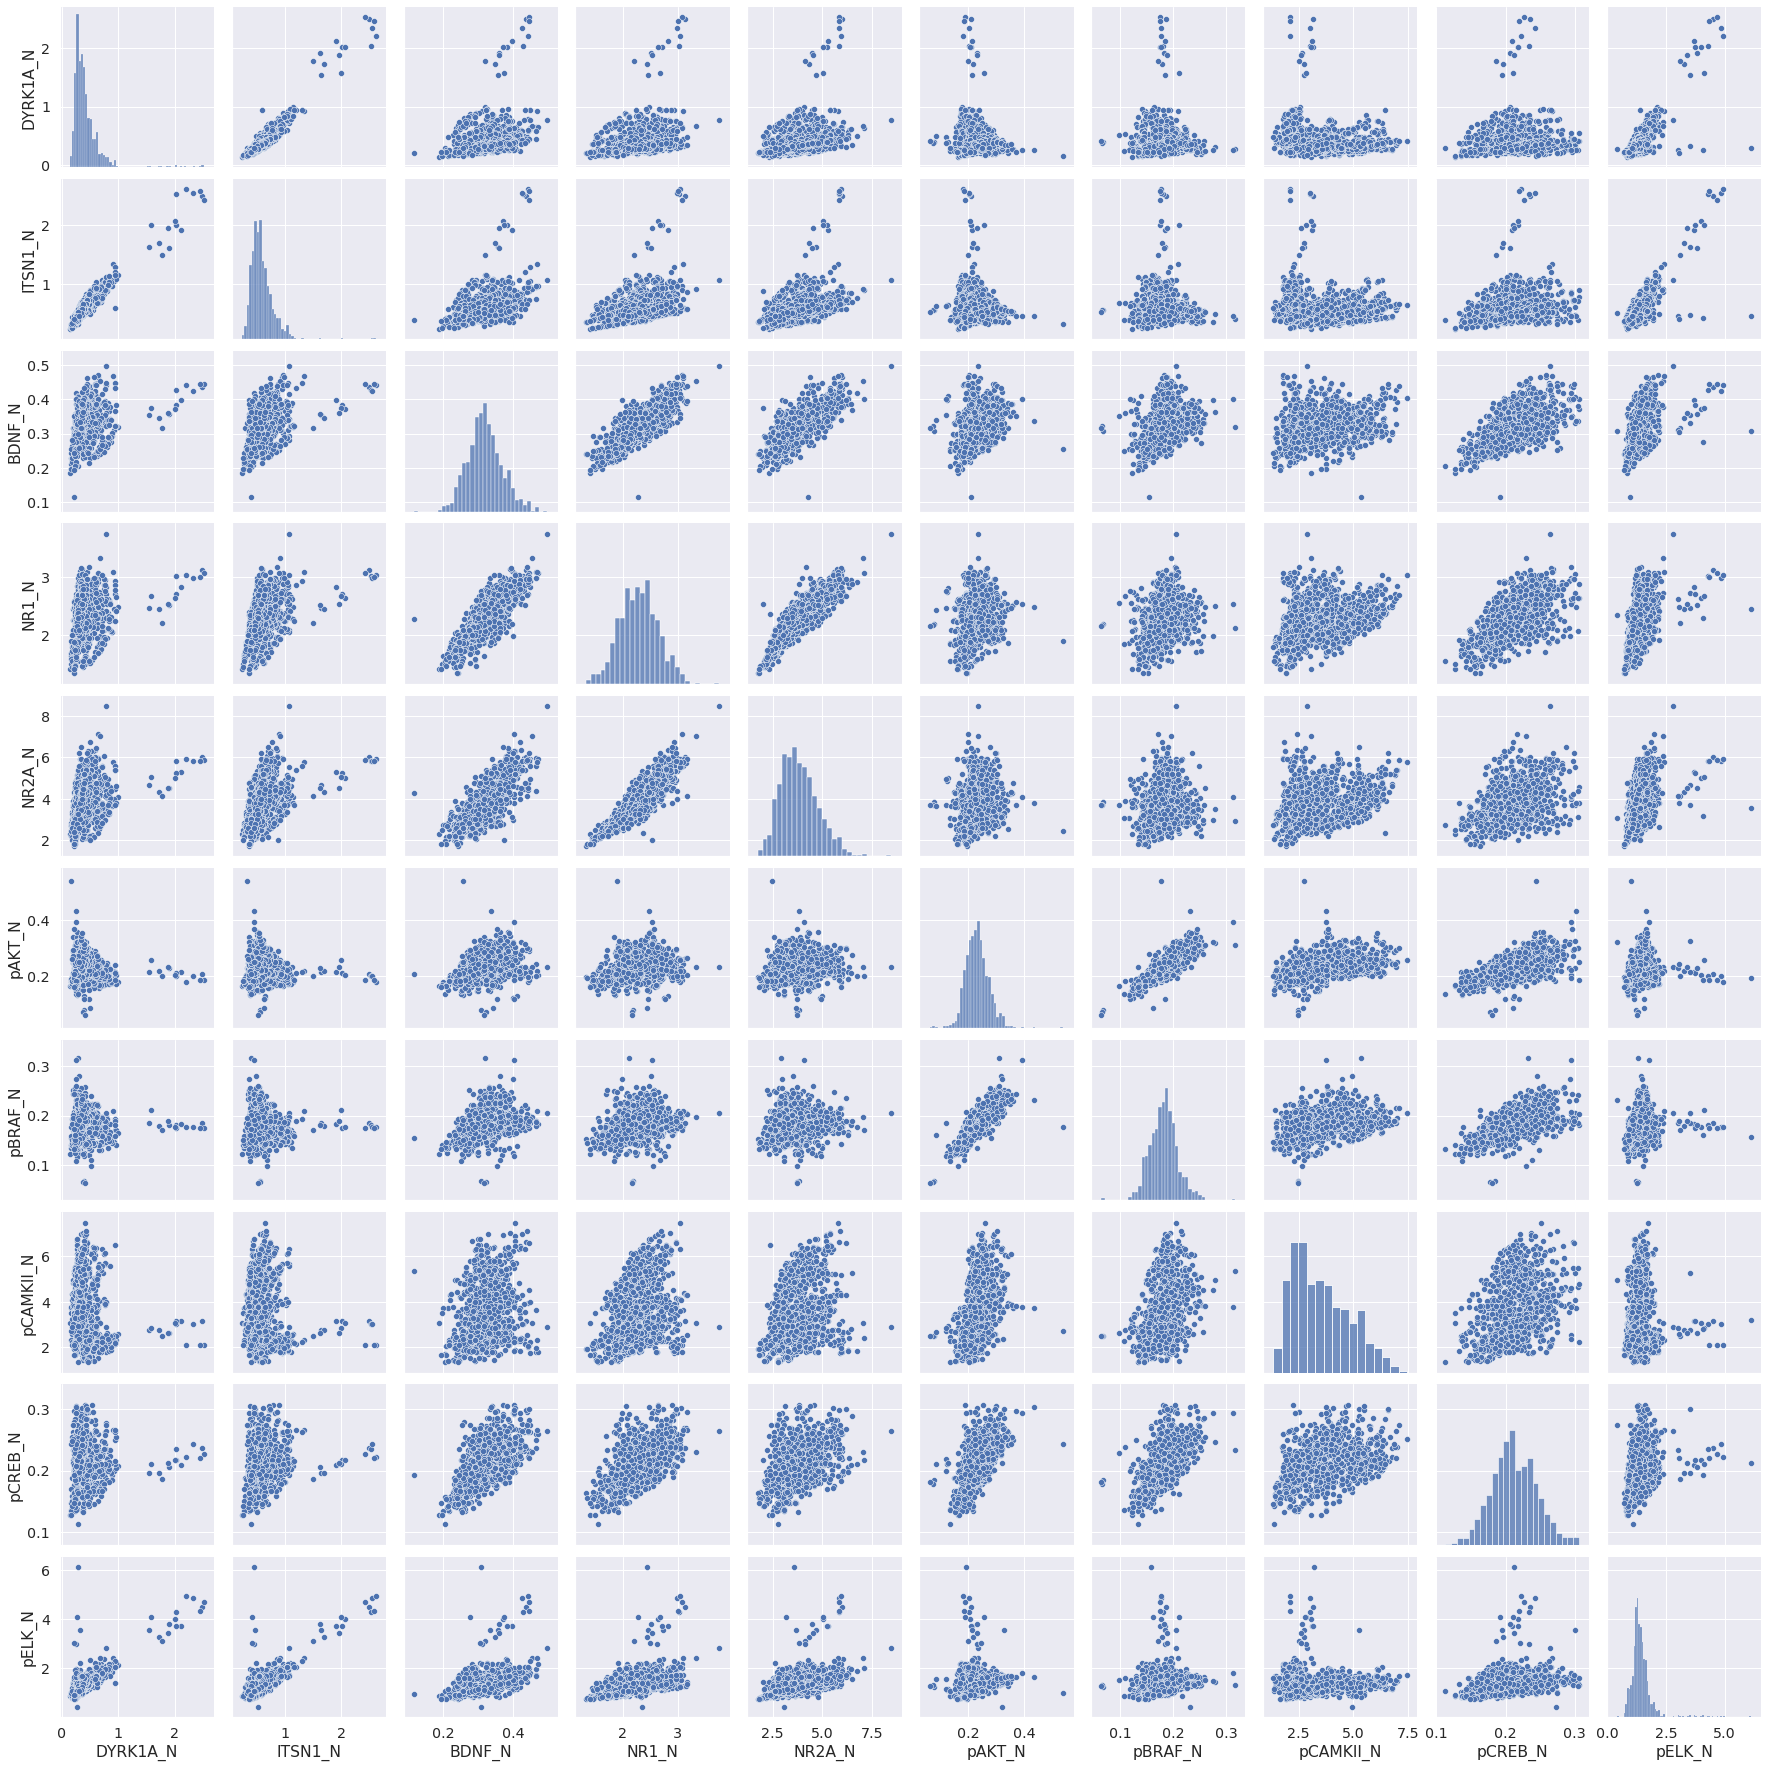

In [68]:
data_to_visualize = data[data.columns[1:11]].dropna()

sns.pairplot(data_to_visualize)

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

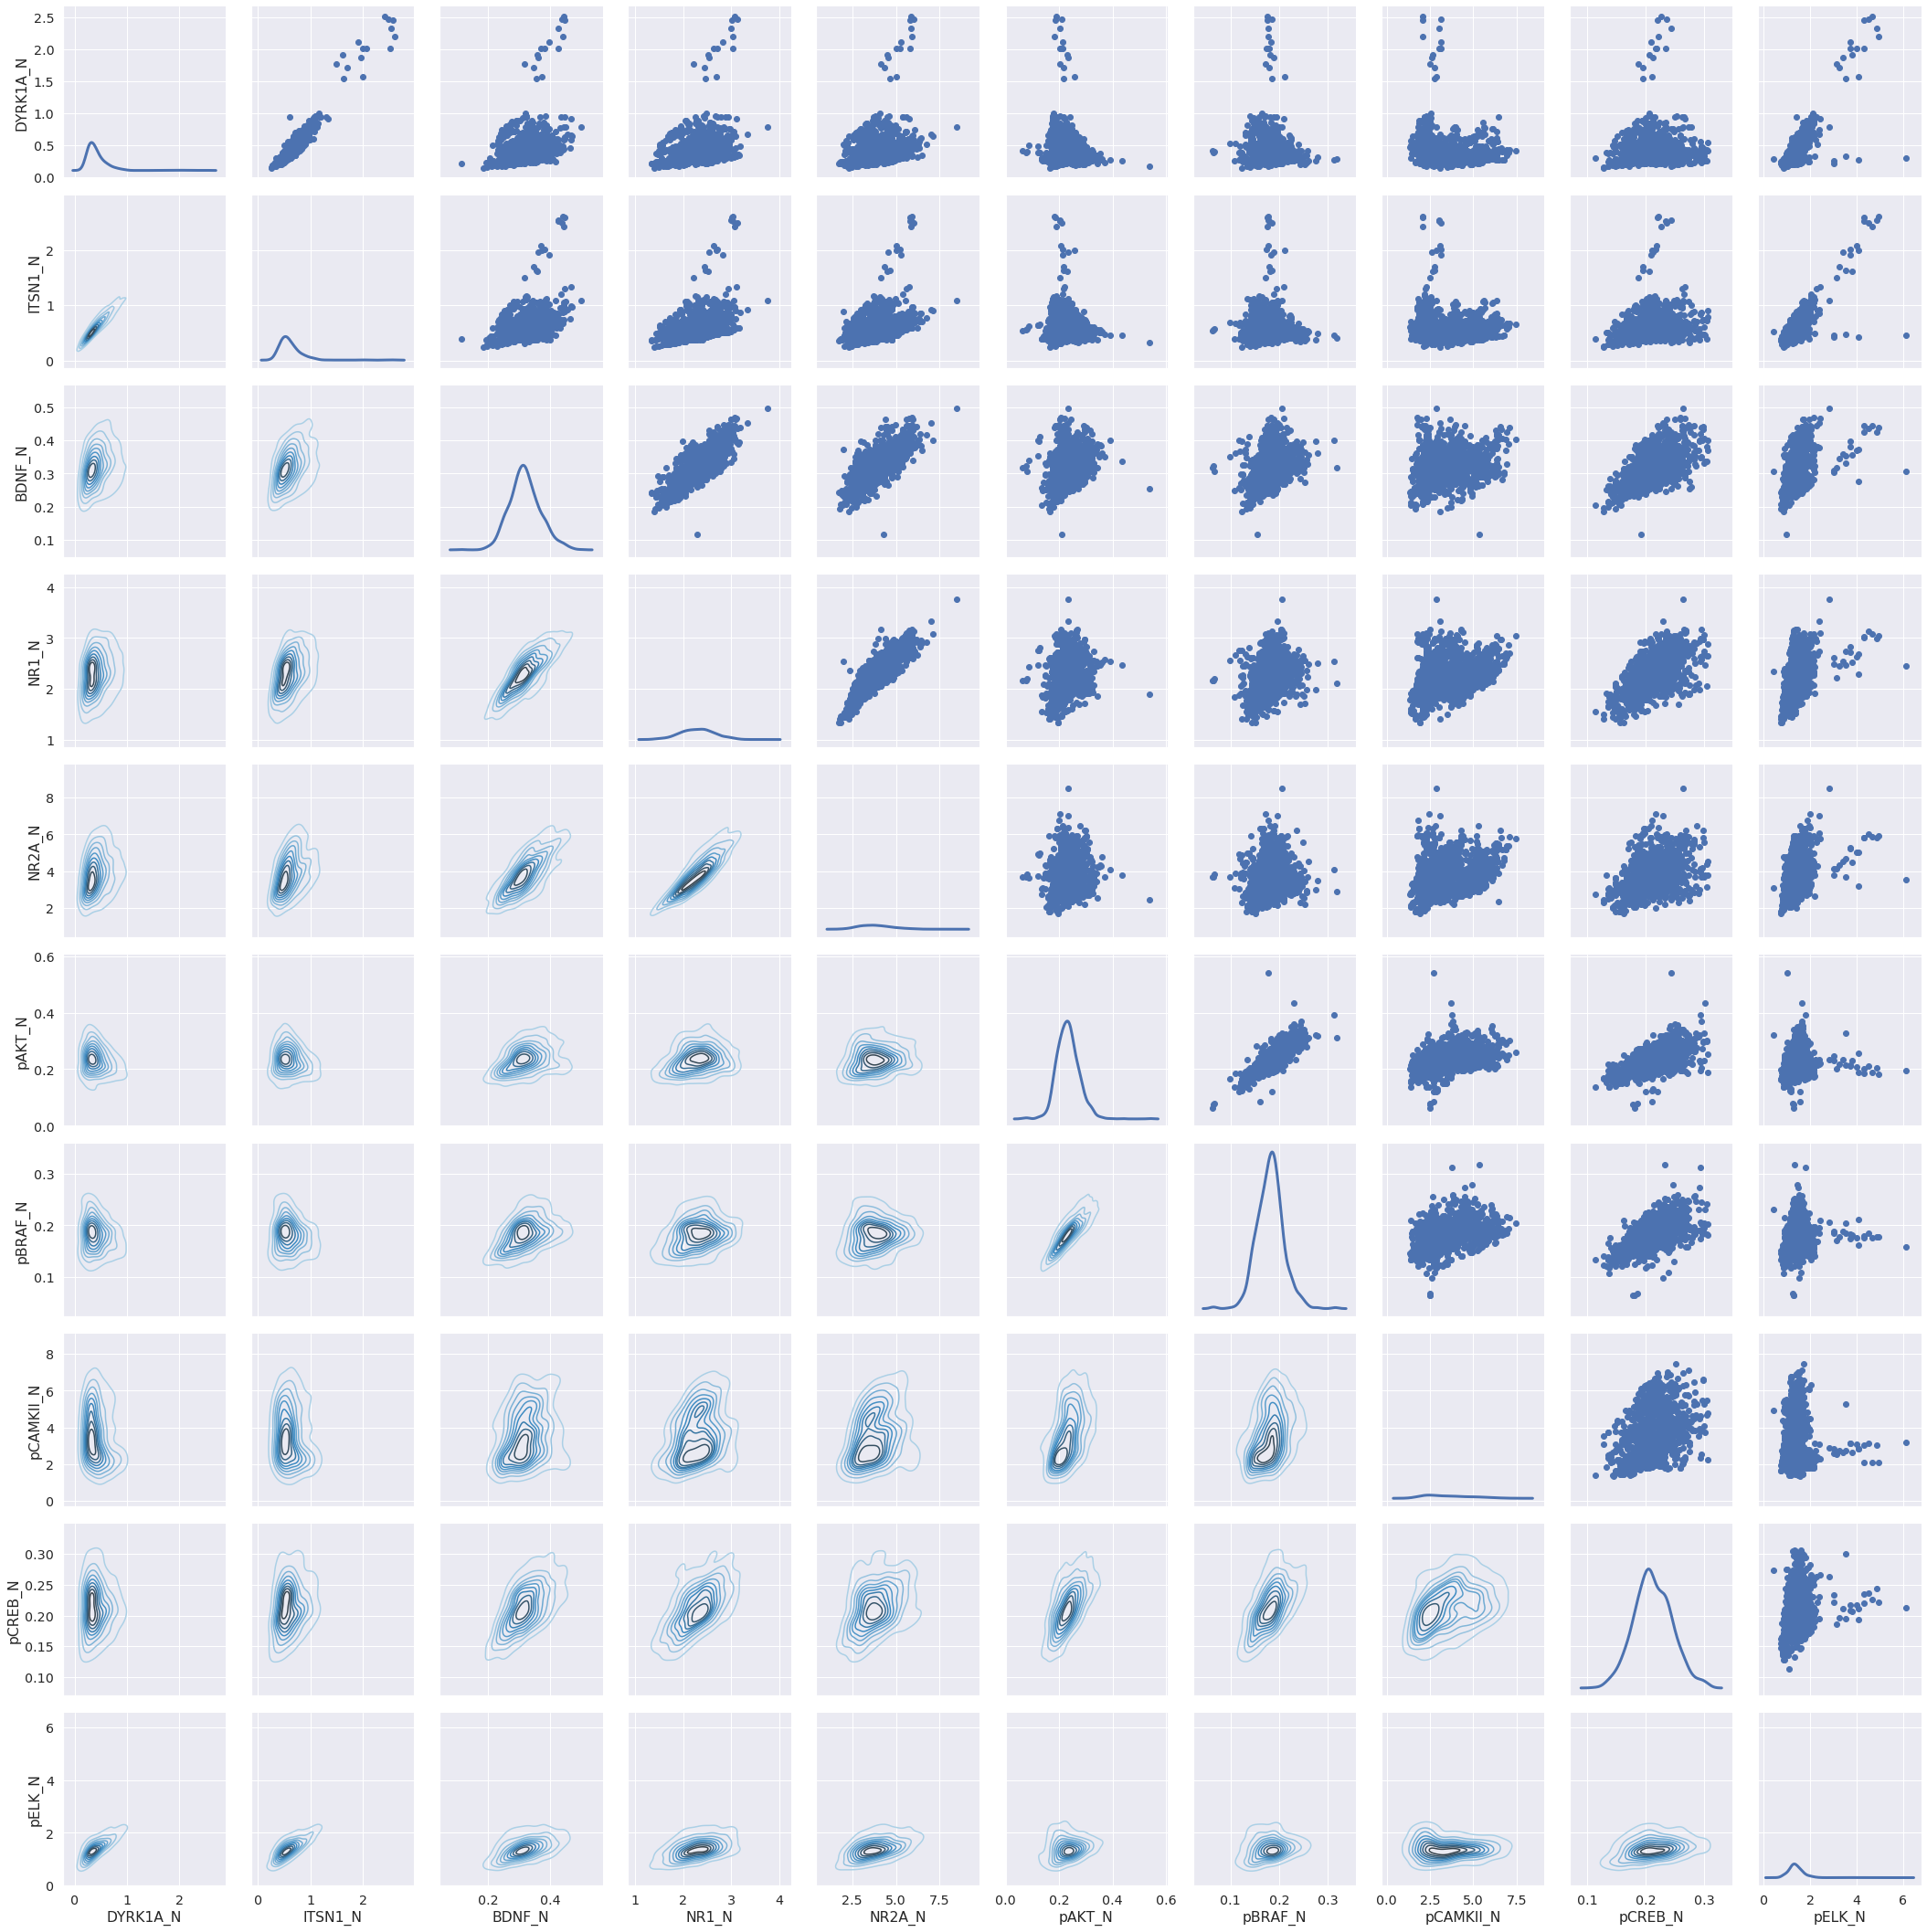

In [69]:
g = sns.PairGrid(data.iloc[:, 1:11].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Посчитайте корреляционную матрицу признаков, соответствующих белкам, и выведите ее с помощью `sns.heatmap`, также выведя значения коэффициентов корреляции в ячейках матрицы.

а) для первых 15 признаков. Сравните корреляционные матрицы, полученные  с использованием трех известных вам коэффициентов корреляции.


б) для всех признаков с использованием коэффициента Спирмена.



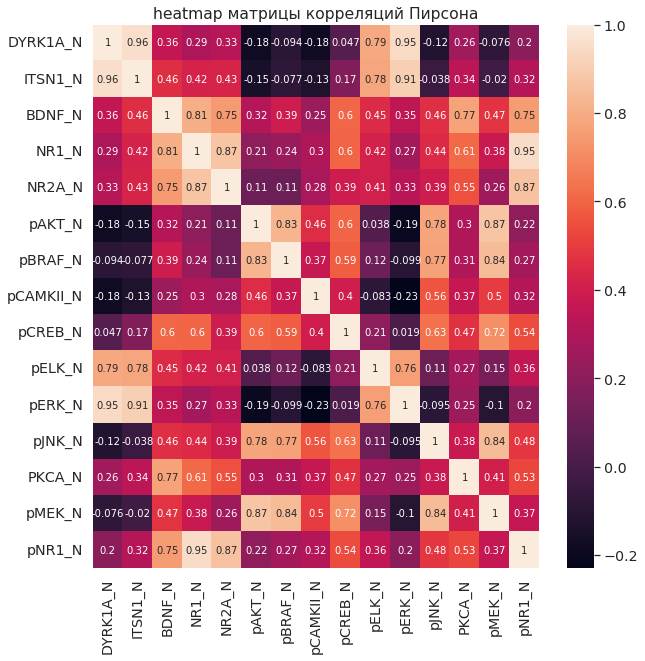

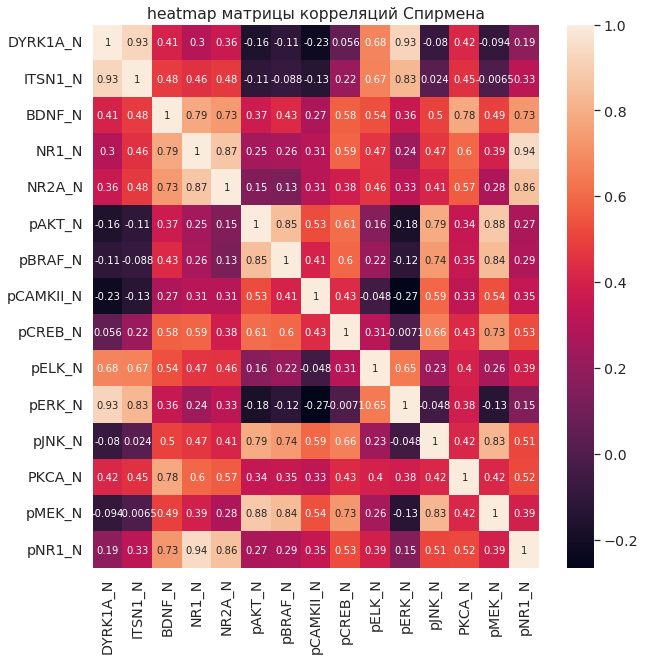

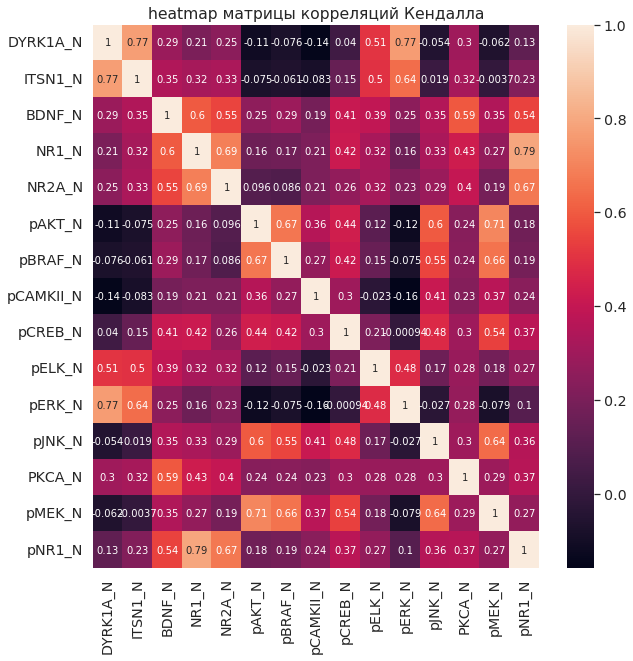

In [63]:
# визуализация матриц ковариации

data_slice = data[data.columns[1:16]]
pearson_corr = data_slice.corr(method='pearson', min_periods=1)
spearman_corr = data_slice.corr(method='spearman', min_periods=1)
kendall_corr = data_slice.corr(method='kendall', min_periods=1)
size = (10, 10)
plt.figure(figsize=size)
plt.title('heatmap матрицы корреляций Пирсона')
sns.heatmap(pearson_corr,annot=True)
plt.show()
plt.figure(figsize=size)
plt.title('heatmap матрицы корреляций Спирмена')
sns.heatmap(spearman_corr,annot=True)
plt.show()
plt.figure(figsize=size)
plt.title('heatmap матрицы корреляций Кендалла')
sns.heatmap(kendall_corr,annot=True)
plt.show()



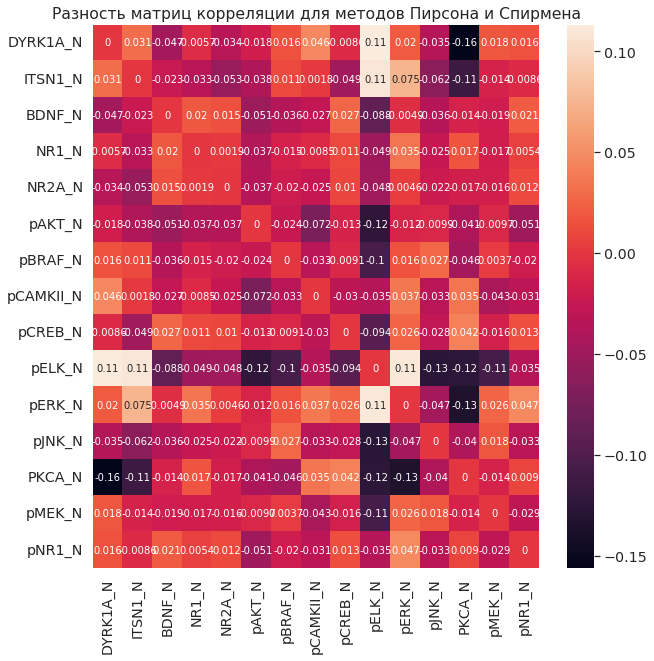

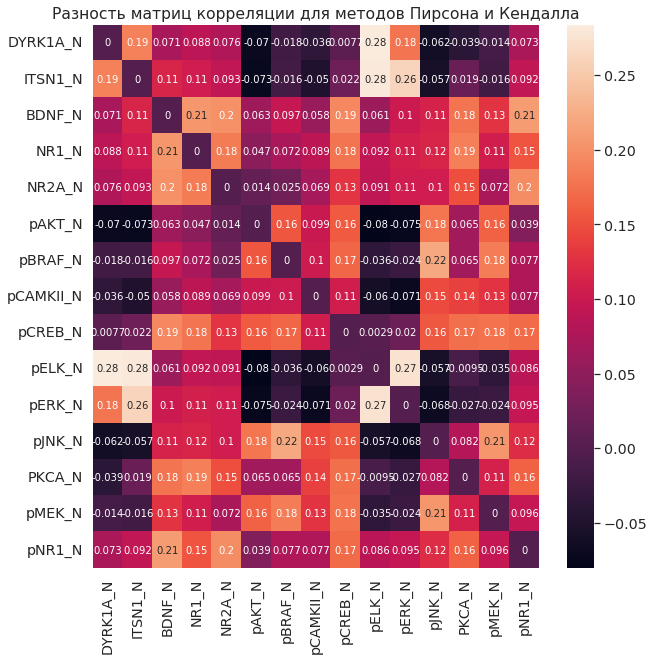

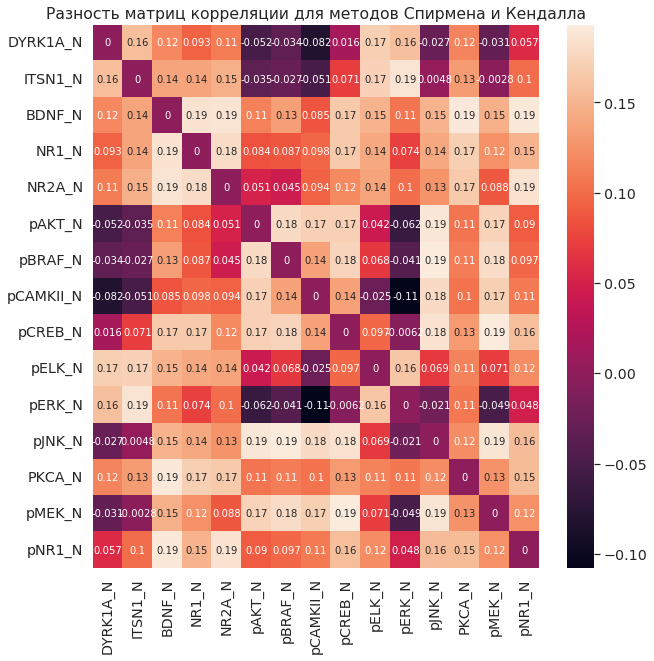

In [77]:
# сравнение 

plt.figure(figsize=size)
plt.title('Разность матриц корреляции для методов Пирсона и Спирмена')
sns.heatmap(pearson_corr-spearman_corr,annot=True)
plt.show()

plt.figure(figsize=size)
plt.title('Разность матриц корреляции для методов Пирсона и Кендалла')
sns.heatmap(pearson_corr-kendall_corr,annot=True)
plt.show()

plt.figure(figsize=size)
plt.title('Разность матриц корреляции для методов Спирмена и Кендалла')
sns.heatmap(spearman_corr-kendall_corr,annot=True)
plt.show()

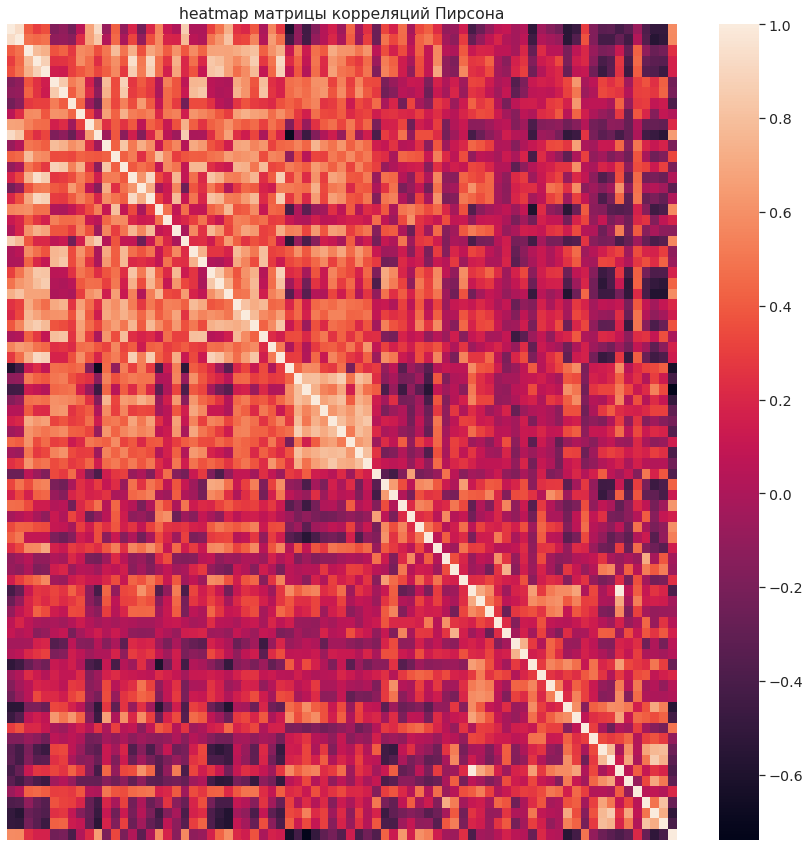

In [76]:
#Все ячейки, метод Спирмена


all_spearman_corr = data[data.columns[1:-4]].corr(method='spearman', min_periods=1)
plt.figure(figsize=(15, 15))
plt.title('heatmap матрицы корреляций Пирсона')
sns.heatmap(all_spearman_corr, annot=False, xticklabels = False, yticklabels = False)
plt.show()

**Вывод**

Видно, что для наших данных методы Спирмена и Пирсона отличаются очень слабо. Матрицы ковариации Спирмена и Кендалла отличаются хоть и не сильно (визуально на 0.1 приблизительно для большинства клеток), но больше чем Спирмена и Пирсона. А вот про отличие матриц ковариации Пирсона и Кендалла сказать сложнее. На некоторых участках (скоплениях клеток) различие превышает 0.2, на некоторых около 0. 

По матрице корреляций для всех признаков можно сказать, что некоторые признаки достаточно сильно зависят друг от друга - это светлые и темные участки на heatmap'e (их корелляция по модулю близка к 1). В остальном же, большинство признаков слабо зависят или вообще не зависят друг от друга $(r \in (-0.4, 0.4))$
***

Далее мы будем исследовать зависимость уровня экспрессии от генотипа. У нас имеется всего два генотипа: обычные мыши и мыши с синдромом Дауна.



Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mappi

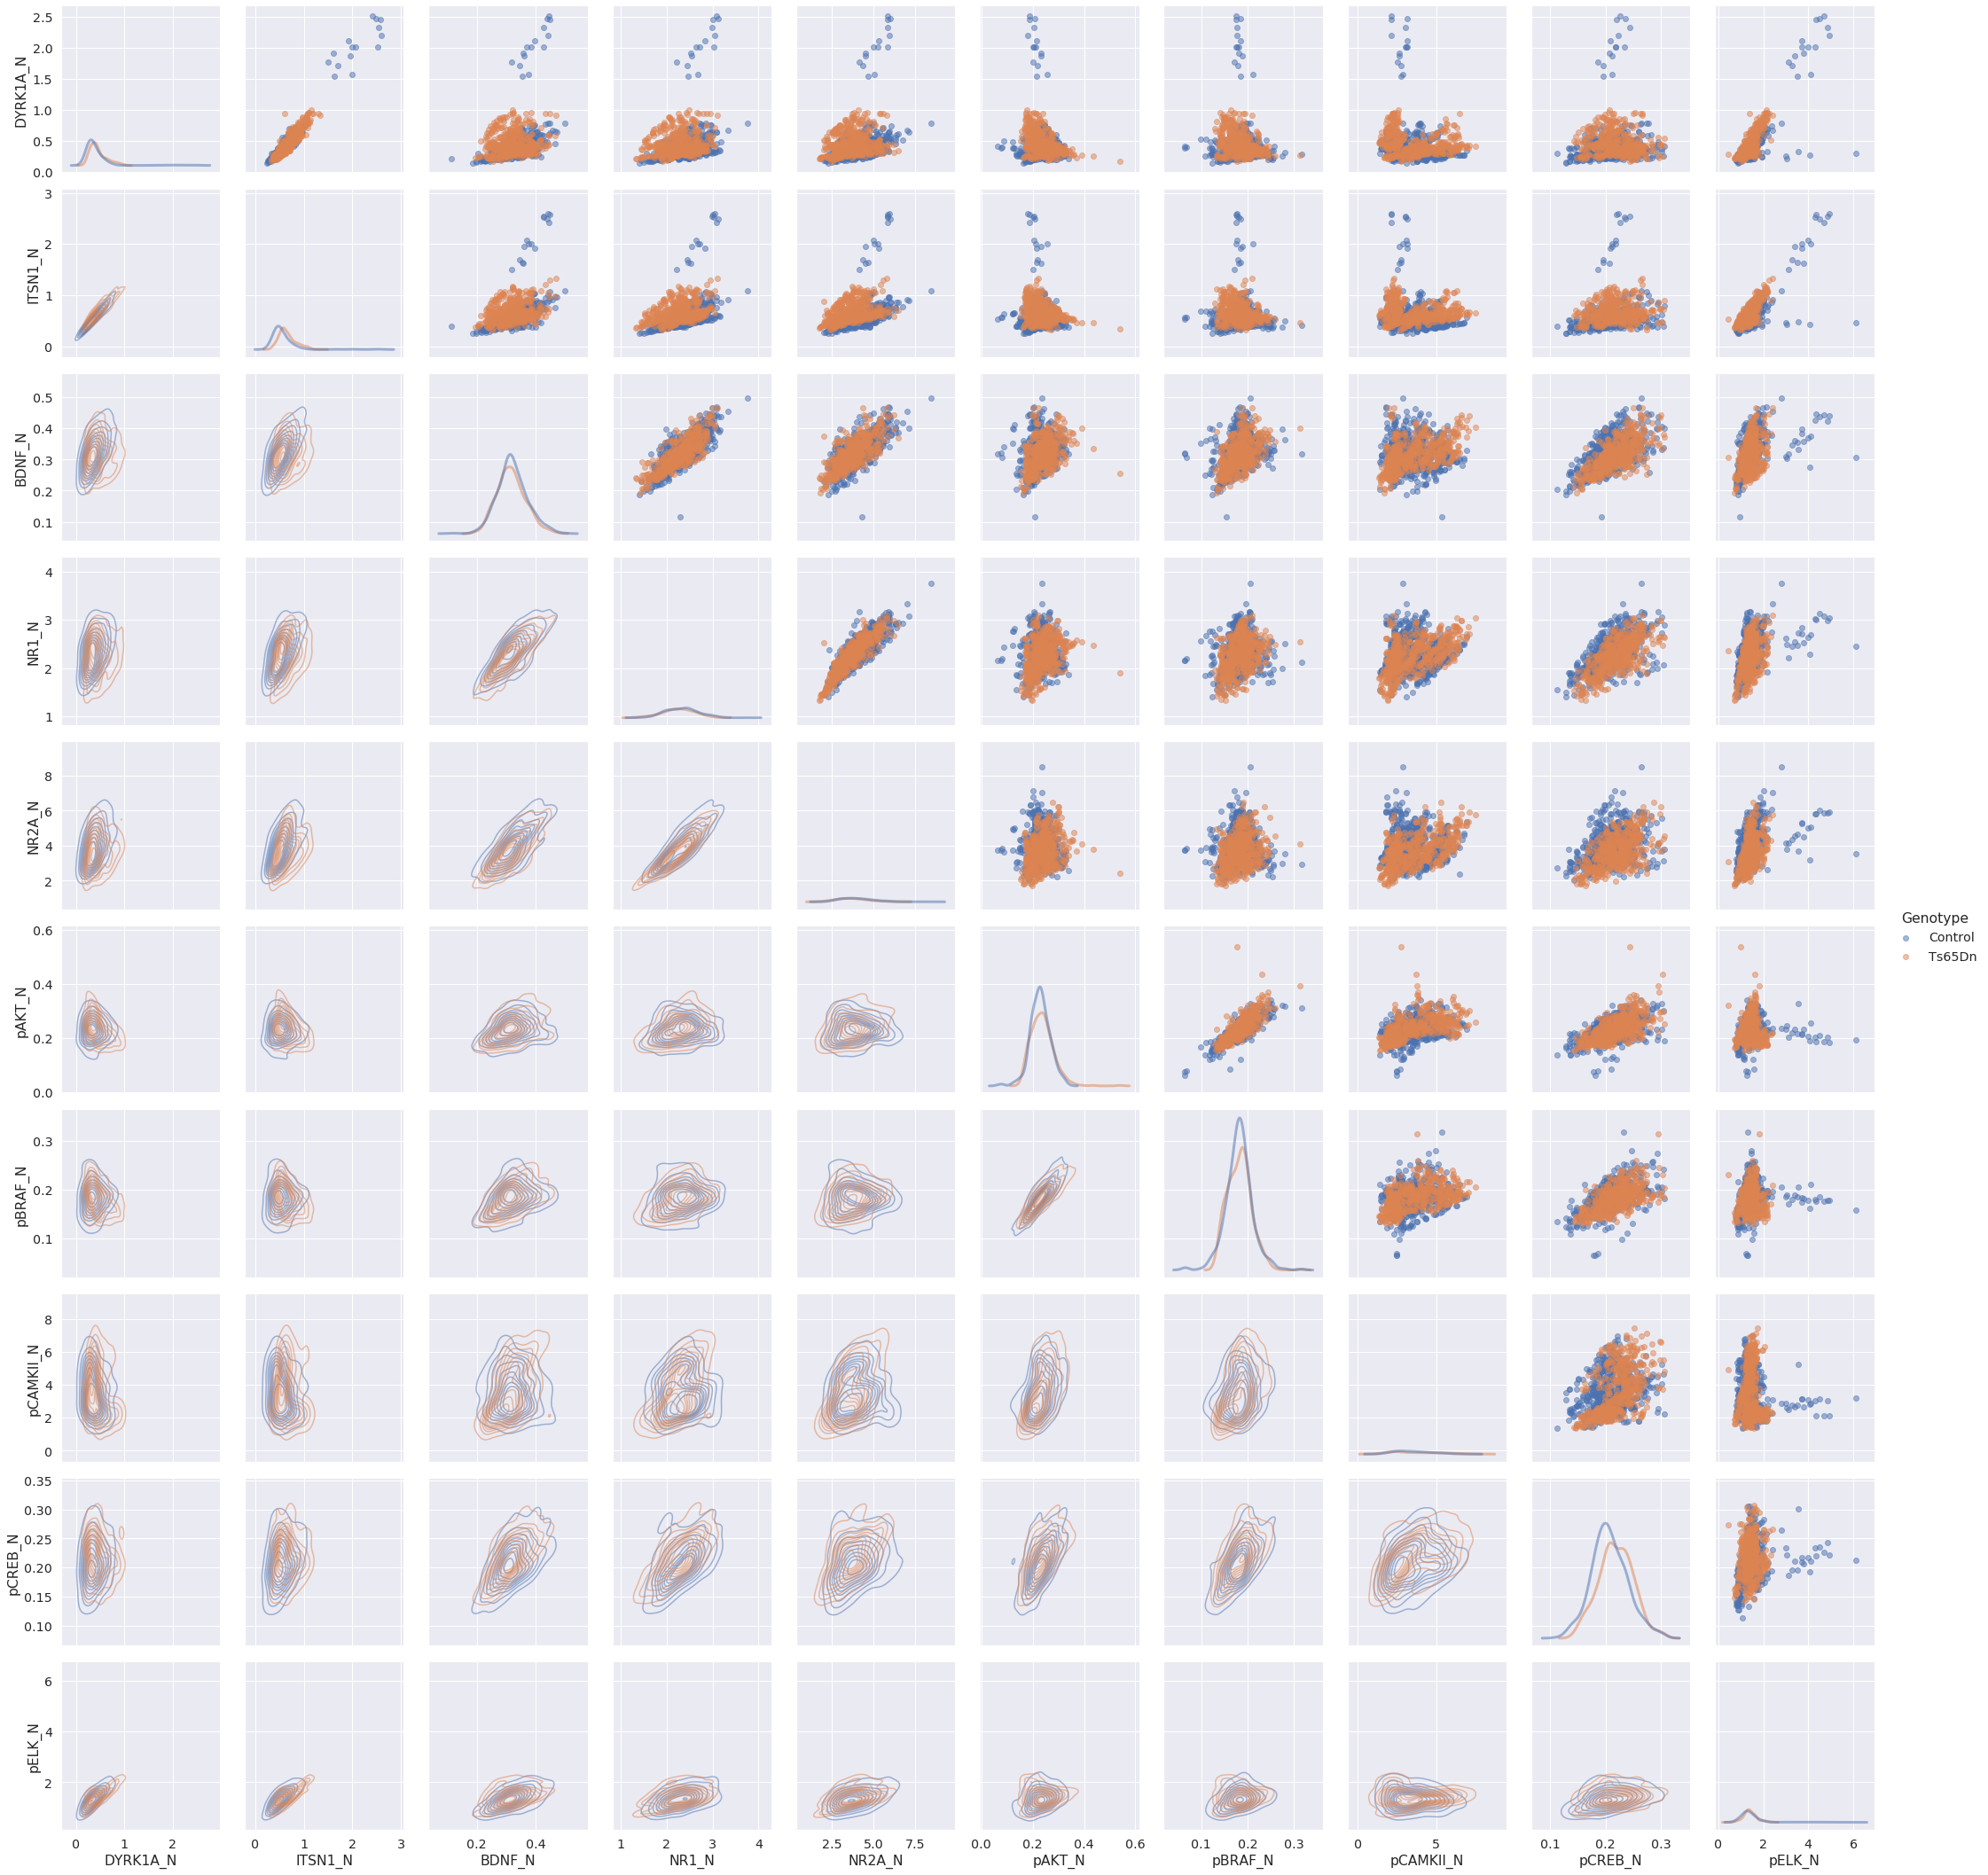

In [100]:
columns = list(data.columns[1: 11])
columns.append(data.columns[-4])
alpha=0.5
gg = sns.PairGrid(data[columns].dropna(), height=3, hue='Genotype',)
gg.map_lower(sns.kdeplot, cmap="Blues_d", alpha=alpha)
gg.map_upper(plt.scatter, alpha=alpha)
gg.map_diag(sns.kdeplot, lw=3, alpha=alpha)
gg.add_legend()
plt.show()


#### 1. Корреляционный анализ

##### 1.1 Влияние генотипа на экспрессию DYRK1A_N 



С помощью ядерных оценок плотности посмотрите, как отличаются распределения `DYRK1A_N` для разных генотипов.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 864x648 with 0 Axes>

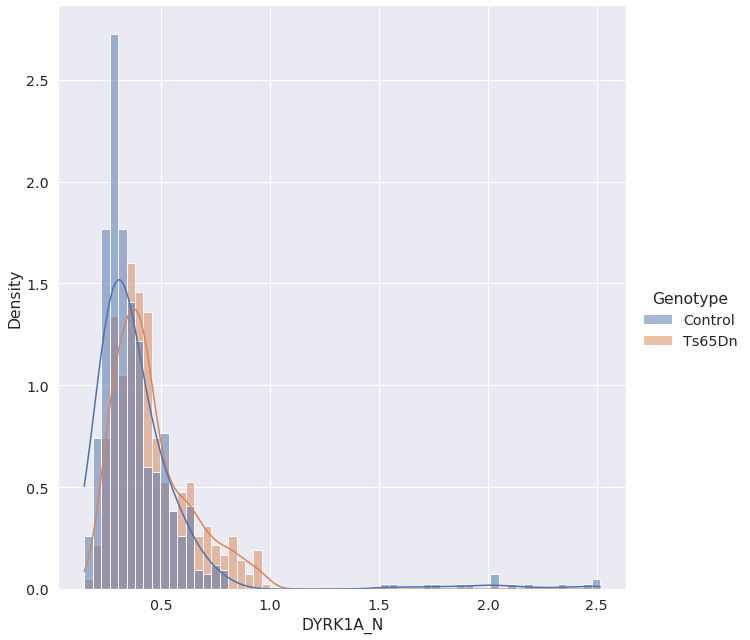

In [166]:
plt.figure(figsize=(12, 9))
sns.displot(data = data[['DYRK1A_N', 'Genotype']].dropna(), hue='Genotype', kde=True, x='DYRK1A_N', height=9, stat="density")
plt.show()



Избавьтесь от выбросов и `nan`. Разделите все значения на 5 корзин и составьте таблицу сопряженности. Можно воспользоваться функцией `np.histogram2d`. В итоге у вас должна получиться таблица размера $5\times2$.


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 864x648 with 0 Axes>

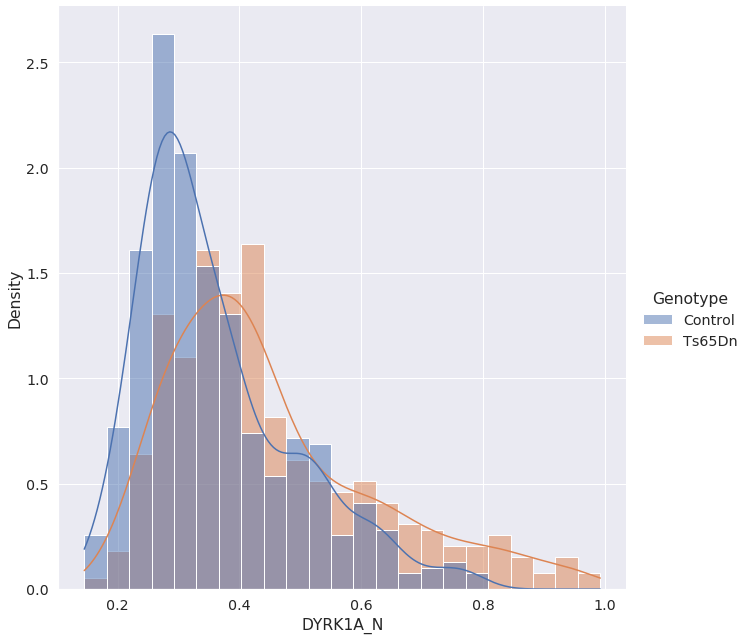

In [167]:
plt.figure(figsize=(12, 9))
ranges = (0, 1)
sns.displot(data = data[data['DYRK1A_N'] < 1][['DYRK1A_N', 'Genotype']].dropna(), 
            hue='Genotype', kde=True, x='DYRK1A_N', height=9, stat="density", kde_kws={"clip":ranges})
plt.show()


In [308]:
X = data['Genotype'][data['DYRK1A_N'] < 1.01].dropna()
y = list(data['DYRK1A_N'][data['DYRK1A_N'] < 1.01].dropna())
x = list([1 if val=='Control' else 0 for i, val in X.iteritems()])

x_edg = [-0.2, 0.5, 1.2] 
y_edg = [-0.2, 0.26, 0.3, 0.36, 0.53, 1]

H, xedges, yedges = np.histogram2d(x, y, bins=(x_edg, y_edg))
print('Гистограмма:')
print(H)

s1 = np.full((2, 5), np.sum(H, axis = 0))
s2 = np.full((5, 2), np.sum(H, axis = 1))

print('Произведение сумм по строке и столбцу, отнесенных к общему числу элементов:')
print(s1*s2.T/(len(x)))

Гистограмма:
[[ 39.  57.  82. 202. 127.]
 [114. 115. 109. 155.  62.]]
Произведение всевозможных сумм, отнесенных к общему числу элементов:
[[ 73.04237288  82.11299435  91.18361582 170.43220339  90.22881356]
 [ 79.95762712  89.88700565  99.81638418 186.56779661  98.77118644]]


Примените критерий хи-квадрат. Следите за условиями применимости критерия.

Видно, что условия применимости критерия выполняются, так как у нас вообще нет ячеек для которых произведение сумм по строкам и столбцам < 5n. 

In [313]:
crit = sps.chi2_contingency(H)
print('p-value =', crit[1])

p-value = 6.644825064019215e-18


Сделайте выводы.

**Вывод**

Визуально кажется, что гистограмма для генотипа Control как бы чуть-чуть сдвинута относительно генотипа Ts65Dn. 

p-value для критерия хи-квадрат равно $6*10^{-18} < 0.05$. Значит, гипотеза о независимости отвергается. Значит, на уровне 0,05  есть связь между экспрессией белка DYRK1A_N и генотипа, причем очень сильная.

##### 1.1 Влияние генотипа на экспрессию BDNF_N

Проведите те же исследования для признака  BDNF_N, начиная с ядерных оценок. Сделайте выводы.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 864x648 with 0 Axes>

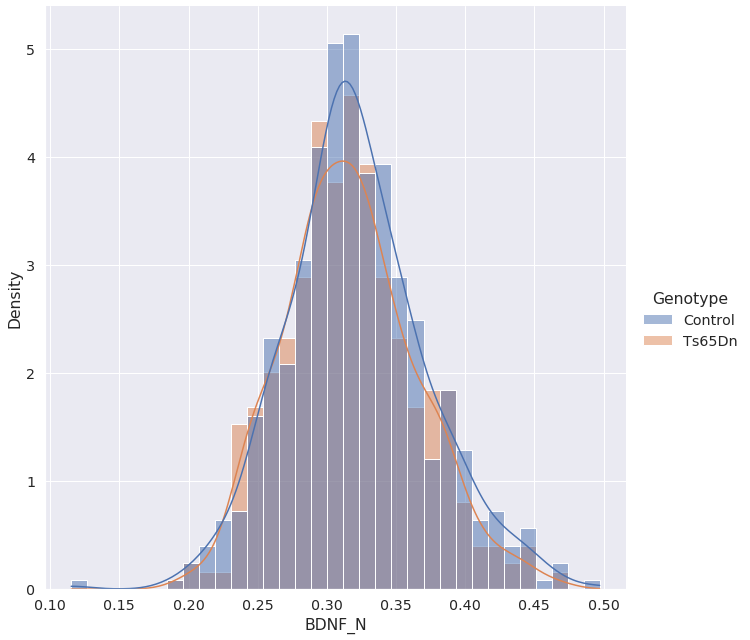

In [271]:
plt.figure(figsize=(12, 9))
sns.displot(data = data[['BDNF_N', 'Genotype']].dropna(), hue='Genotype', kde=True, x='BDNF_N', height=9, stat="density")
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 864x648 with 0 Axes>

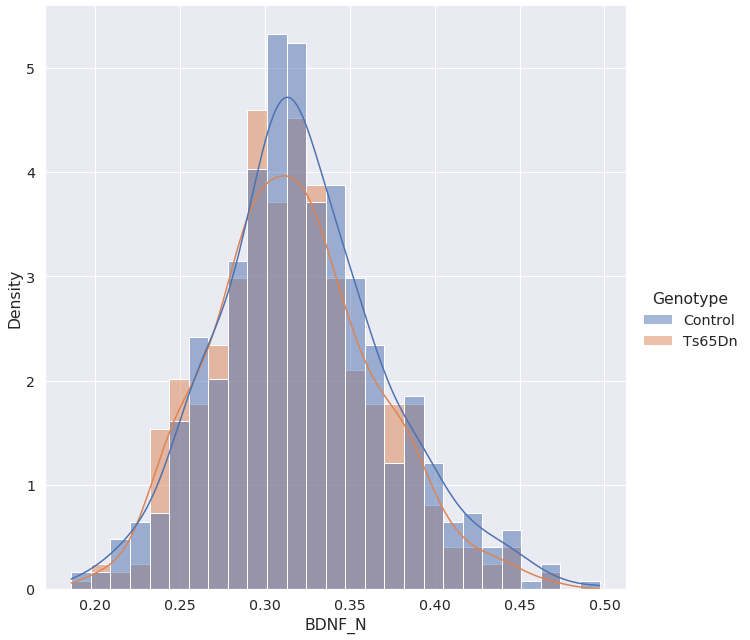

In [278]:
plt.figure(figsize=(12, 9))
ranges_ = (0.15, 0.5)
sns.displot(data = data[data['BDNF_N'] >0.15 ][['BDNF_N', 'Genotype']].dropna(), 
            hue='Genotype', kde=True, x='BDNF_N', height=9, stat="density", kde_kws={"clip":ranges_})
plt.show()


In [310]:
X_ = data['Genotype'][data['BDNF_N'] < 1.01].dropna()
y_ = list(data['BDNF_N'][data['BDNF_N'] < 1.01].dropna())
x_ = list([1 if val=='Control' else 0 for i, val in X_.iteritems()])

x_edg_ = [-0.2, 0.5, 1.2] 
y_edg_ = [0.15, 0.27, 0.30, 0.32, 0.35, 0.6]

H_, xedges_, yedges_ = np.histogram2d(x_, y_, bins=(x_edg_, y_edg_))

print('Гистограмма:')
print(H_)

s1_ = np.full((2, 5), np.sum(H_, axis = 0))
s2_ = np.full((5, 2), np.sum(H_, axis = 1))

print('Произведение сумм по строке и столбцу, отнесенных к общему числу элементов:')
print(s1_*s2_.T/(len(x_)))



Гистограмма:
[[ 83. 109.  89. 111. 115.]
 [ 91.  98. 109. 125. 146.]]
Произведение сумм по строке и столбцу, отнесенных к общему числу элементов:
[[ 81.91086351  97.44568245  93.20891365 111.09749304 122.86629526]
 [ 91.9275766  109.36211699 104.60724234 124.68337976 137.8913649 ]]


Видно, что условия применимости критерия выполняются, так как у нас вообще нет ячеек для которых произведение сумм по строкам и столбцам < 5n.

In [312]:
crit_ = sps.chi2_contingency(H_)
print('p-value =', crit_[1])

p-value = 0.4161680245765508


**Вывод** Посмотрим на p_value для критерия хи-квадрат. p-value = 0.42 > 0.05, значит, гипотеза о независимости уровня экспресиии белка BDNF_N и генотипа не отвергается на уровне значимости 0,05. 

Продолжение следует...